# From https://www.kaggle.com/code/xvivancos/market-basket-analysis

In [65]:
# Load libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Read the data
df = pd.read_csv("D:/Document/Data_Analysis/DataSet/BreadBasket_DMS.csv")

# Convert to transactions and  change to list plus remove duplicate item
#transactions = df.groupby("Transaction")["Item"].apply(lambda x: list(set(x))).tolist()
transactions = (
    df.groupby("Transaction")["Item"] #Convert into transaction
      .apply(lambda x: list(dict.fromkeys(x)))  # remove duplicates, keep order
      .tolist()
)

#Encode with one hot method
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions,sparse=True)
trans = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)

C:\Users\ANM\AppData\Local\Temp\ipykernel_20980\2567603433.py:20: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  trans = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)


In [61]:
association_rules(te1,metric="confidence",min_threshold=0.4)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,1.0,0.00535,1.109667,0.109767,0.103745,0.098829,0.320679


In [45]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Support and confidence values
support_levels = [0.1, 0.05, 0.01, 0.005]
confidence_levels = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# Empty lists to store number of rules
rules_sup10 = []
rules_sup5 = []
rules_sup1 = []
rules_sup05 = []

# Loop for support = 0.1
for conf in confidence_levels:
    freq_items = apriori(trans, min_support=support_levels[0], use_colnames=True)
    rules = association_rules(freq_items, metric="confidence", min_threshold=conf)
    rules_sup10.append(len(rules))

# Loop for support = 0.05
for conf in confidence_levels:
    freq_items = apriori(trans, min_support=support_levels[1], use_colnames=True)
    rules = association_rules(freq_items, metric="confidence", min_threshold=conf)
    rules_sup5.append(len(rules))

# Loop for support = 0.01
for conf in confidence_levels:
    freq_items = apriori(trans, min_support=support_levels[2], use_colnames=True)
    rules = association_rules(freq_items, metric="confidence", min_threshold=conf)
    rules_sup1.append(len(rules))

# Loop for support = 0.005
for conf in confidence_levels:
    freq_items = apriori(trans, min_support=support_levels[3], use_colnames=True)
    rules = association_rules(freq_items, metric="confidence", min_threshold=conf)
    rules_sup05.append(len(rules))


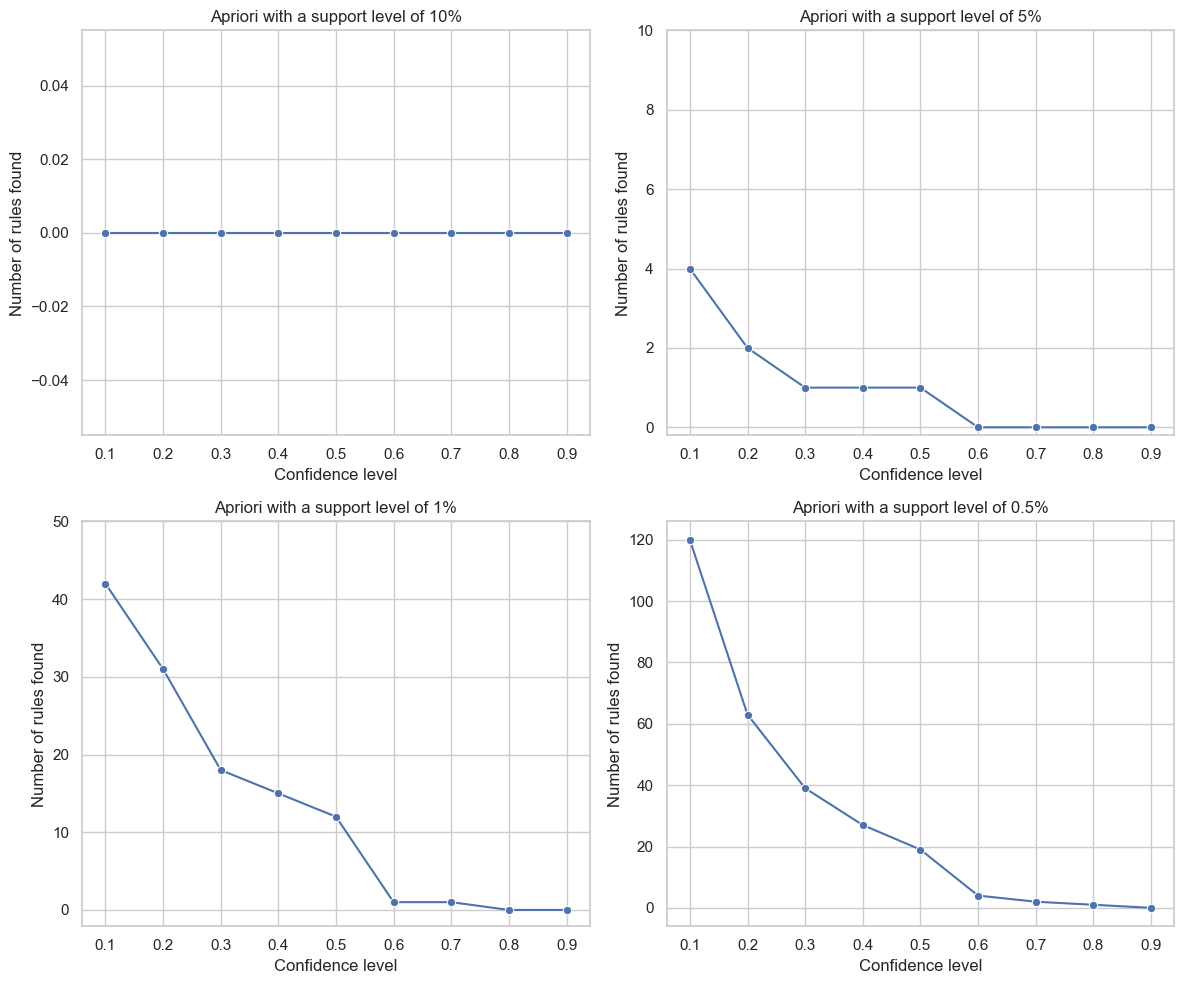

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create figure and axes (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1 — Support 10%
sns.lineplot(x=confidence_levels, y=rules_sup10, marker="o", ax=axs[0,0])
axs[0,0].set_title("Apriori with a support level of 10%")
axs[0,0].set_xlabel("Confidence level")
axs[0,0].set_ylabel("Number of rules found")

# Plot 2 — Support 5%
sns.lineplot(x=confidence_levels, y=rules_sup5, marker="o", ax=axs[0,1])
axs[0,1].set_title("Apriori with a support level of 5%")
axs[0,1].set_xlabel("Confidence level")
axs[0,1].set_ylabel("Number of rules found")
axs[0,1].set_yticks(range(0, 11, 2))

# Plot 3 — Support 1%
sns.lineplot(x=confidence_levels, y=rules_sup1, marker="o", ax=axs[1,0])
axs[1,0].set_title("Apriori with a support level of 1%")
axs[1,0].set_xlabel("Confidence level")
axs[1,0].set_ylabel("Number of rules found")
axs[1,0].set_yticks(range(0, 51, 10))

# Plot 4 — Support 0.5%
sns.lineplot(x=confidence_levels, y=rules_sup05, marker="o", ax=axs[1,1])
axs[1,1].set_title("Apriori with a support level of 0.5%")
axs[1,1].set_xlabel("Confidence level")
axs[1,1].set_ylabel("Number of rules found")
axs[1,1].set_yticks(range(0, 130, 20))

# Adjust layout
plt.tight_layout()
plt.show()


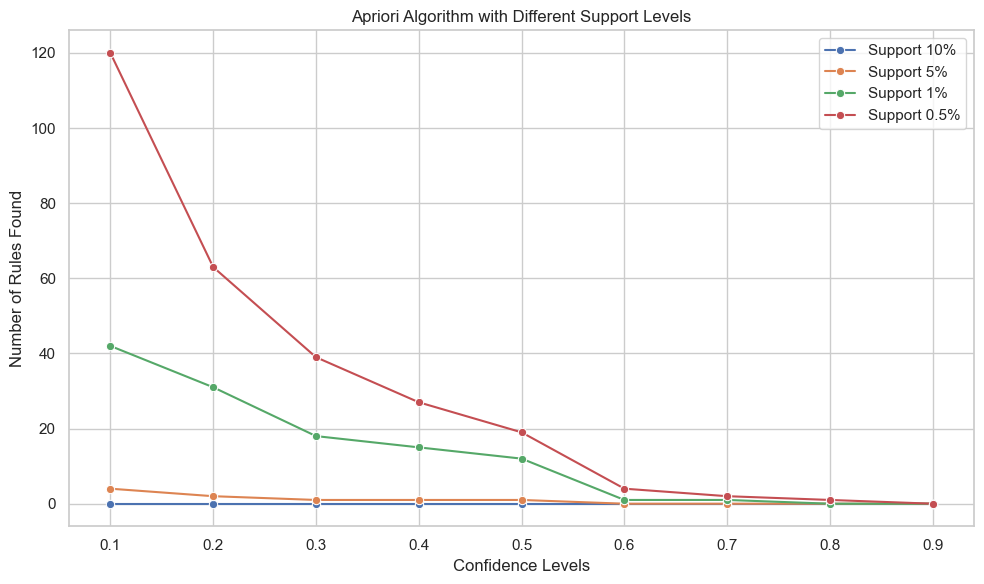

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------------
# Example Data (replace with your real data)
# --------------------------
# confidenceLevels = [0.1, 0.2, 0.3, 0.4, 0.5]
# rules_sup10 = [100, 80, 60, 40, 20]
# rules_sup5  = [150, 120, 90, 60, 30]
# rules_sup1  = [250, 200, 150, 100, 50]
# rules_sup05 = [300, 250, 200, 150, 100]

# --------------------------
# Convert to long-format DataFrame (like ggplot expects)
# --------------------------
df = pd.DataFrame({
    "Confidence": confidence_levels,
    "Support 10%": rules_sup10,
    "Support 5%": rules_sup5,
    "Support 1%": rules_sup1,
    "Support 0.5%": rules_sup05
})

# Melt to long format for Seaborn
df_melt = df.melt(id_vars="Confidence", 
                  var_name="Support Level", 
                  value_name="Number of Rules")

# --------------------------
# Plot
# --------------------------
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melt, x="Confidence", y="Number of Rules", hue="Support Level", marker="o")

plt.title("Apriori Algorithm with Different Support Levels")
plt.xlabel("Confidence Levels")
plt.ylabel("Number of Rules Found")
plt.legend(title="")  # removes legend title like theme(legend.title=element_blank())
plt.tight_layout()
plt.show()


In [52]:
from mlxtend.frequent_patterns import apriori, association_rules

# ---- Assume you already have your one-hot encoded dataframe ----
# Example: trans is a DataFrame like this:
# bread  milk  butter
# True   True  False
# True  False  True
# ...

# Support and confidence thresholds
supportLevels = [0.1, 0.05, 0.01, 0.005]
confidenceLevels = [0.1, 0.2, 0.3, 0.4, 0.5]

# ---- Step 1: Find frequent itemsets ----
frequent_itemsets = apriori(
    trans, 
    min_support=supportLevels[2],   # same as supportLevels[3] in R (R is 1-indexed)
    use_colnames=True
)

# ---- Step 2: Generate association rules ----
rules_sup1_conf50 = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=confidenceLevels[4]  # same as confidenceLevels[5] in R
)

# ---- Optional: show results ----
rules_sup1_conf50


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,1.0,0.002368,1.142861,0.125899,0.039693,0.125003,0.290888
1,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,1.0,0.005350,1.109667,0.109767,0.103745,0.098829,0.320679
2,(Cookies),(Coffee),0.054034,0.475081,0.028014,0.518447,1.091280,1.0,0.002343,1.090053,0.088422,0.055905,0.082613,0.288707
3,(Hot chocolate),(Coffee),0.057916,0.475081,0.029378,0.507246,1.067704,1.0,0.001863,1.065276,0.067309,0.058333,0.061276,0.284542
4,(Juice),(Coffee),0.038296,0.475081,0.020460,0.534247,1.124537,1.0,0.002266,1.127031,0.115155,0.041507,0.112713,0.288656
5,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,1.0,0.005779,1.218561,0.176213,0.069665,0.179360,0.321387
6,(NONE),(Coffee),0.079005,0.475081,0.042073,0.532537,1.120938,1.0,0.004539,1.122908,0.117145,0.082172,0.109455,0.310548
7,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,1.0,0.006590,1.172079,0.152626,0.091968,0.146815,0.325764
8,(Sandwich),(Coffee),0.071346,0.475081,0.037981,0.532353,1.120551,1.0,0.004086,1.122468,0.115847,0.074701,0.109106,0.306150
9,(Scone),(Coffee),0.034309,0.475081,0.017941,0.522936,1.100729,1.0,0.001642,1.100310,0.094762,0.036507,0.091165,0.280350
